In [14]:
import os;
import numpy as np;
from numpy import linalg as LA;
import matplotlib.pyplot as plt

# Import the data
dir_path = os.path.dirname(os.path.realpath('.')) + "/CSE250B hw7/" ;
fname = dir_path + "hw7-data0.txt"
print fname, os.path.isfile(fname) 
tab = np.genfromtxt(dir_path+'hw7-data0.txt', delimiter=' ')
print tab.shape

# Seperate the data be label as plotting scatters is easier that way
labels,data=tab[:,2],tab[:,:2]
DATA = {label: data[labels==label] for label in np.unique(labels)}   
print len(DATA), DATA[0].shape, DATA[1].shape, DATA[2].shape, DATA[3].shape

/Users/bmehaffy/Documents/GitHub/UCSD_CSE/CSE250B hw7/hw7-data0.txt True
(48, 3)
4 (12, 2) (15, 2) (9, 2) (12, 2)


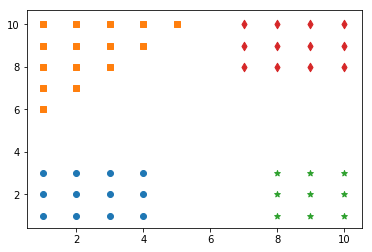

===Done===


In [15]:
X = tab[:,0]
Y = tab[:,1]
Z = tab[:,2].astype(int)
shape = ['o','s','*','d']

for i in range(4):
    plt.scatter(DATA[i][:,0],DATA[i][:,1], marker=shape[i])
plt.show()
print "===Done==="

In [16]:
# Define necessary functions
def maxIndex(a):
    top = a[0]
    index = 0
    for i in range(len(a)):
        if a[i] > top:
            top = a[i]
            index = i
    return index;

def predict(W,xx,yy):
    return maxIndex(W.dot([[1],[xx],[yy]]))
print "===Done==="

===Done===


In [17]:
# Build the multiclass perceptron
W = np.array([[0.,0.,0.],[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]])
for i in range(len(X)):
    # predict based on current Z
    xx,yy,zz = X[i],Y[i],Z[i]
    z_hat = maxIndex(W.dot([[1],[xx],[yy]]))
    # update the perception
    W[zz,:] = W[zz,:] + np.array([1.,xx,yy])
    W[z_hat,:] = W[z_hat,:] - np.array([1.,xx,yy])
print W

W = np.array([[0.,0.,0.],[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]])
print W
for i in range(len(X)):
    # predict based on current Z
    xx,yy,zz = X[i],Y[i],Z[i]
    z_hat = predict(W,xx,yy)
    
    # update the perception
    W[zz,:] = W[zz,:] + np.array([1,xx,yy])
    W[z_hat,:] = W[z_hat,:] - np.array([1,xx,yy])
print W
print "===Done==="

[[-1. -1. -6.]
 [ 0. -7.  5.]
 [ 0.  1. -7.]
 [ 1.  7.  8.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[-1. -1. -6.]
 [ 0. -7.  5.]
 [ 0.  1. -7.]
 [ 1.  7.  8.]]
===Done===


XXX (10, 10) (10, 10) (10, 10)
[[-1. -1. -6.]
 [ 0. -7.  5.]
 [ 0.  1. -7.]
 [ 1.  7.  8.]]
[[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]]


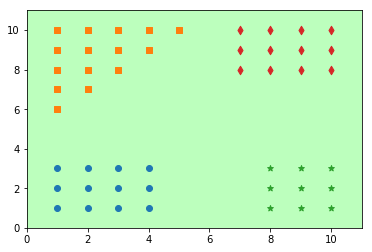

===Done===


In [19]:
n = 10
x = np.linspace(0,11,n)
y = np.linspace(0,11,n)
X,Y = np.meshgrid(x,y)
Z = np.zeros(X.shape)
print "XXX",X.shape, Y.shape, Z.shape
print W
for iy in range(X.shape[0]):
    for ix in range(X.shape[1]):
        test = predict(W,X[iy,ix],Y[iy,ix])
        Z[iy][ix] = test

print Z
C1 = plt.contourf(X, Y, Z, alpha=.5, cmap='jet')
C2 = plt.contour(X, Y, Z, colors='black')

for i in range(4):
    plt.scatter(DATA[i][:,0],DATA[i][:,1], marker=shape[i])
plt.show()
print "===Done==="